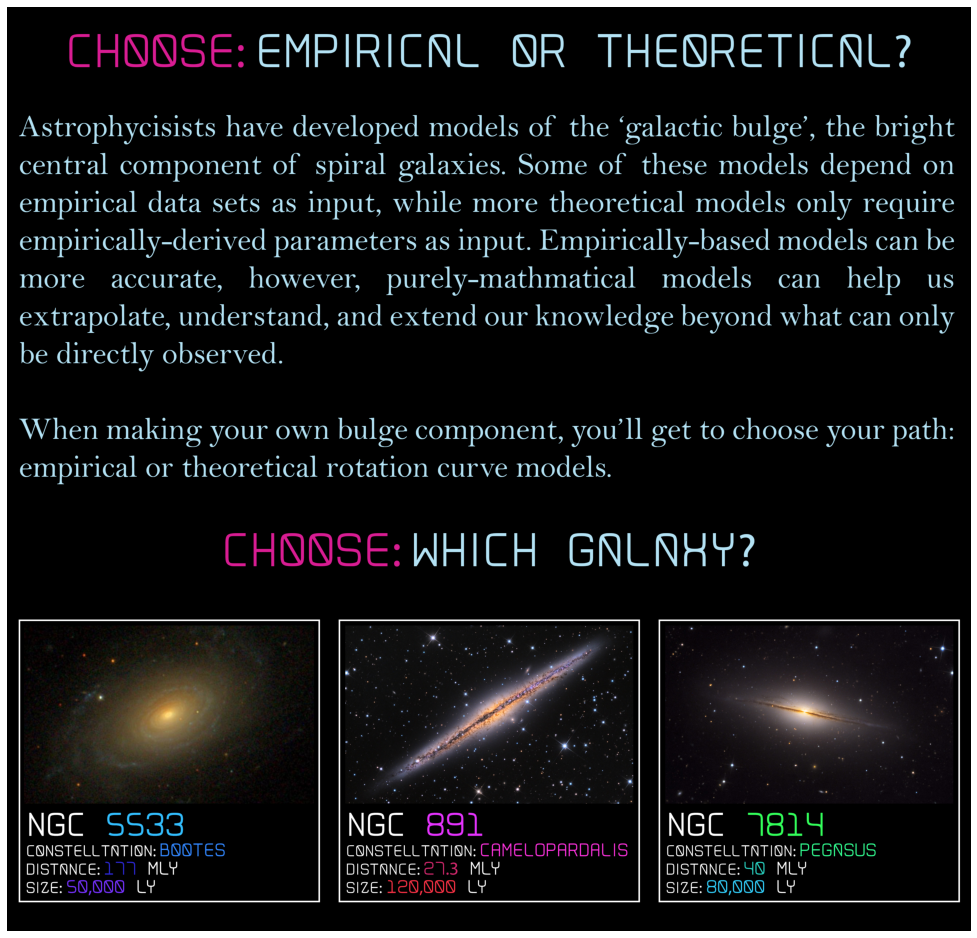

In [1]:
import time
startTime = time.time()
import matplotlib.image as mpimg
from matplotlib import pyplot as plt     # matplotlib library for plotting
img = mpimg.imread('bulge.png')
plt.figure(figsize=(20,17))                 #size of the plot
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
galaxy='5533' #change this value to select which galaxy you want

## Introduction

__What is a bulge?__ Dense, bulbous central region of a galaxy.

The theoretical bulge model was implemented from [Noordermeer (2008)](https://doi.org/10.1111/j.1365-2966.2008.12837.x). 

***
## Equations

_Source: Noordermeer (2008)_
>__Luminosity__: <br>
    \begin{equation}
    I_b(\kappa) = I_0 \exp \left[-\left(\frac{\kappa}{r_0} \right)^{\frac{1}{n}}\right]
    \end{equation}
    <br>
>where:<br>
        $I_0$ = central surface brightness<br>
        $n$ = concentration parameter<br> 
        $r_0$ = characteristic radius (related to $r_e$)<br>
        $r_e$ = effective radius<br>
<br>
>__Gamma function__: <br>
from Noordermeer's paper<br>
    \begin{equation}
    \gamma(b_n,2n) = \frac{1}{2} \Gamma(2n)
    \end{equation}<br>
    \begin{equation}
    r_e = b_n^n r_0 b_n 
    \end{equation}<br>
from Anthony's calculations<br>
    \begin{equation}
    \gamma(n,u_e) = \frac{1}{2} \Gamma(n)
    \end{equation}<br>

>__Velocity__: <br>
    <font color="green">
    \begin{equation}
V_{B}^{2}(r) = C \int_{m=0}^{r} \left[\int_{\kappa=m}^{\infty} \frac {e^{-\left(\frac{\kappa}{r_0}\right)^{\frac{1}{n}}} \left(\frac{\kappa}{r_0}\right)^{\frac{1}{n-1}}} {\sqrt{\kappa^2-m^2}} d\kappa\right] \times \frac{m^{2}}{\sqrt{r^{2}-m^{2}e^{2}}} dm
    \end{equation}<br></font>
>where:<br>
    \begin{equation}
    C = \frac{4Gq\Upsilon_b I_0}{r_0n} \sqrt{sin^{2}i + \frac{1}{q^{2}} cos^{2}i}
    \end{equation}<br>
    \begin{equation}
    e = \sqrt{1-q^{2}}
    \end{equation}<br> 
        $\Upsilon_b$ = mass-to-light ratio<br>
        $e$ = eccentricity of the bulge<br>
        $q$ = intrinsic axis ratio<br> 
        $i$ = inclination angle<br> 
        $G$ = gravitational constant<br>
    <br>
***

In [3]:
# Importing python libraries for our calculations
import numpy as np                       # numpy library for basic calculations
import scipy.integrate as si             # for integration
import scipy.optimize as so              # for finding the root of the gamma function
import scipy.special as ss               # for the gamma function

## Parameters

### Definition

__### In Progress ###__

<b>Gravitational constant ($G$)</b>: empirical constant of the universal law of gravitation, converted to $kpc \times(km/s)^{2}$ $/$ $M_{\odot}$ to match all other units. <br><br>

<b>Concentration parameter ($n$)</b>: as Noordermeer describes: _"$n$ is a concentration parameter that describes the curvature of the profile in a radiusmagnitude plot"_ (pg.1361, Noordermeer 2008). <br><br>

<b>Intrinsic axis ratio ($q$)</b>: _"q [is] the intrinsic axis ratio of the bulge isodensity surfaces"_ (pg.1360, Noordermeer 2008). This parameter describes how flat a galaxy appears. The eccentricity of the galaxy can be calculated from this parameter: $e$ = $\sqrt{1 - q^{2}}$.
<br><br>

<b>Characteristic radius ($r_0$) and Effective radius ($r_e$)</b>: as Noordermeer suggests, _"$r_0$ is the characteristic radius, which is related to the effective radius ($r_e$, the radius which encompasses 50 percent of the light) as $r_e$ = $b_{n}^{n}$ $r_0$ $b_n$ is a scaling constant that is defined such that it satisfies $\gamma$($b_n$, 2n) = $^1/_2$$\Gamma$(2n), with $\gamma$ and $\Gamma$ the incomplete and complete gamma functions, respectively."_ (pg.1361, Noordermeer 2008).<br><br>

<b>Inclination angle ($i$)</b>: the angle of the galaxy from the horizontal. 

<b>Mass-to-light ratio ($\Upsilon_b$)</b>: the ratio of how much mass there is compared to how much it is seen. 

<b>Luminosity ($L_\odot$)</b>: I'm trying to figure out where we got the 3.27e10 value from. We might have just guessed this value. Noordermeer mentions on page 5 of his 2008 paper: "The effects of the seeing on the measured bulge parameters were corrected for, using the deconvolutions from Graham (2001)."
***Found some things in our old Disk velocity calculations.***
- L = 10^(0.4*(Mag_sun - Mag_absolute))
    - This was commented out.
- Mag_absolute = -22.02, Mag_Sun = 4.42
- Mag_absolute does not match M_B (-21.22) or M_R (-22.62) from Noordermeer's papers.
    - Manually using one of these values does not result in a match, either.

<b>Central surface brightness ($I_0$)</b>: The central surface brightness was explained by Noordermeer as: <br>
_"$I_0$ and $r_0$ scaled such that all bulges have equal total luminosity ($L_b$ = 5 × $10^9$ $L_\odot$) and
effective radius ($r_e$ = 1 kpc)."_ <br>
This resulted from the gamma function the following way in our code: $I_0 = L*root^{2n}/(r_e^2*2\pi n*gamma(2n))$. <br>


($L$ is luminosity, $gamma$ is the gamma function, $root$ is the root of the gamma function, $n$ is concentration parameter, $r_e$ is the effective radius.) <br> We found an equation in this paper that was referenced by Noordermeer: [_Graham: An investigation into the prominence of spiral galaxy bulges_](https://iopscience.iop.org/article/10.1086/318767/pdf) (pg.822/eq.3): <br>


$L_{tot} = \frac{n2\pi r^2_eI_ee^b}{(b_n)^{2n}}\Gamma(2n)$, where $I_0 = I_ee^b$.The calculation resulted in a central surface brightness of about 4.10e10 (units?).

### Assigning values

In [4]:

if galaxy=='7814':
    
    #**************************
    #******NGC 7814 Bulge****
    #*************************

    # parameters for NGC 7814 provided in this paper: https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf 
    #parameters 
    n = 10       #concentration parameter (section 3.3 par.1)
    re = 2.16    #effective radius, [kpc] (table 4)
    L = 7e10     #bulge luminosity, [Lsun] (table 4)
    ups = .71    #mass-to-light ratio of bulge given DM halo (table 5)
    q = 0.61     #intrinsic axis ratio (table 4)
    i=90         #inclination angle [degrees] (table 1)

    #import GIPSY bulge for comparison bulge:
    bulge = np.loadtxt('../testing/7814reallybulge.dat')
    prefactor=4.98 #from our fitting with NGC 7814
    radii,k,b = bulge.T #ignore k

elif galaxy=='891':
    
    #**************************
    #******NGC 891 Bulge****
    #*************************

    # parameters for NGC 891 provided in this paper: https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf 
    #parameters 
    n = 10        #concentration parameter (section 3.3 par.1)
    re = 1.8      #effective radius, [kpc] (table 4)
    L = 2.2e10    #bulge luminosity, [Lsun] (table 4)
    ups = 1.63    #mass-to-light ratio of bulge given DM halo (table 5)
    q = 0.68      #intrinsic axis ratio (table 4)
    i=89          #inclination angle [degrees] (table 1)

    #import GIPSY bulge for comparison bulge:
    #bulge = np.loadtxt('../NGC891/891_bulge.dat')
    prefactor=1 #from our fitting with NGC 891???
    radii,k,b = bulge.T #ignore k

elif galaxy=='5533':
    #**************************
    #******NGC 5533 Bulge******
    #**************************
    # Also known as UGC 9133

    # parameters 
    n = 2.7        #concentration parameter [unitless] (Source: Noordermeer and Van Der Hulst 2007)
    re = 2.6       #effective radius, [kpc] (Source: Noordemeer and Van Der Hulst 2007) 
                                            #re is 9.9 arcsec, and was converted to kpc using D = 54.3 Mpc for the distance to the galaxy. The calculated value is: 2.6 kpc
    L = 3.27e10    #bulge luminosity, [Lsun] (source? -> still working on this)
    ups = 2.8      #mass-to-light ratio of bulge [unitless](Source: Noordermeer 2008: Table 1 for q = 0.33)
    q = 0.3        #intrinsic axis ratio [unitless] (Source: Noordermeer and Van Der Hulst 2007)
    i = 52         #inclination angle [degrees] (Source: Noordermeer and Van Der Hulst 2007)

    # import GIPSY bulge for comparison bulge:
    bulge = np.loadtxt('../NGC5533/ngc 5533 total/data/NGC5533-bulge_fmt.txt')
    prefactor = 1 #this is a trace...
    radii,b = bulge.T
    
else:
    print(str('Sorry, we do not have data for galaxy NGC '+ galaxy))
    raise SystemExit("Stop right there!")

## Gamma function

In [5]:
i = i*(np.pi/180)                                  #inclination angle

gammafunction = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(gammafunction,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations

## Define values

In [6]:
I0 = L*root**(2*n)/(re**2*2*np.pi*n*ss.gamma(2*n))
r0 = re/root**n

## Integrand 1

In [7]:
integrand1 = lambda x,m: np.exp(-np.power(x/r0, (1/n)))*np.power(x/r0, 1/n-1)/(np.sqrt(x**2-m**2))

## Integration

In [8]:
f = lambda m: si.quad(integrand1, m, np.inf,args=(m,))[0]
fv = np.vectorize(f)

## Define more values

In [9]:
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)

C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)


## Integrand 2

In [10]:
g = lambda m,r: C*f(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

## Integrate to get velocity squared

In [11]:
velsq = lambda r: si.quad(g, 0, r, args=(r,))[0]
velsqv = np.vectorize(velsq)

## Calculate velocity

In [12]:
vbulge = np.sqrt(velsqv(radii))

## Plot the velocity curve for the bulge

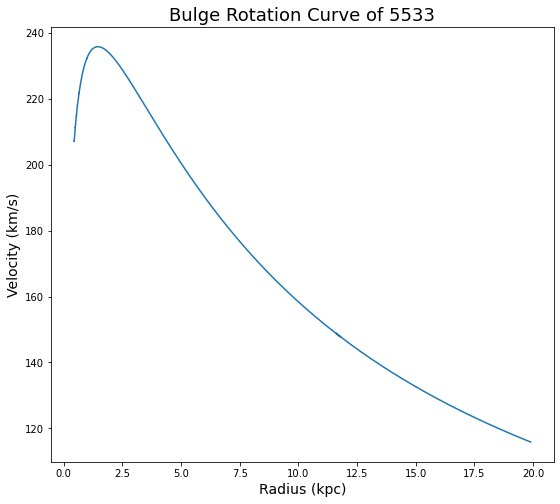

In [13]:
plt.figure(figsize=(9.0,8.0))                                     # size of the plot
plt.plot(radii, prefactor*vbulge, linestyle='solid', label='Velocity(r)')  # x and y values of the plot          
plt.title(str('Bulge Rotation Curve of '+galaxy), fontsize=18)                    # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=14)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=14)                        # labeling the y-axis
plt.savefig('bulge_theoretical.png')                              # saving the figure in a .png file

## Questions

##### Does the bulge have any effect on the rotation of the stars at 35 kpc?

##### What effect does changing the concentration parameter, $n$ to a lower number will have on the rotation curve?

##### Some questions about the curve

## References

>Noordermeer, Edo. __“The Rotation Curves of Flattened Sérsic Bulges.”__ _Monthly Notices of the Royal Astronomical Society_ 385, no. 3 (October 22, 2008): 1359–64. https://doi.org/10.1111/j.1365-2966.2008.12837.x. 

>Noordermeer, E., and J. M. Van Der Hulst. __“The Stellar Mass Distribution in Early-Type Disc Galaxies: Surface Photometry and Bulge–Disc Decompositions.”__ _Monthly Notices of the Royal Astronomical Society_ 376, no. 4 (April 2007): 1480–1512. https://doi.org/10.1111/j.1365-2966.2007.11532.x. 

>Fraternali F, Sancisi R, Kamphuis P. __"A tale of two galaxies: light and mass in NGC 891 and NGC 7814."__ _Astronomy & Astrophysics_. 2011;531:A64. doi:10.1051/0004-6361/201116634

In [14]:
executionTime = (time.time() - startTime)
ttt=executionTime/60
print(f'Execution time: {ttt:.2f} minutes')

Execution time: 14.00 minutes
